<font color = darkblue size =5><center> PROBLEM STATEMENT

<font color = GREEN size =3.5><center> Prediction of abnormal blood pressure.

<font color = darkblue size =5><center> OBJECTIVE

<font color = GREEN size =3.5>Employing statistical techniques, conduct a preliminary prognosis of Hypertenstion / Hypotension, based on the all given factors. 

<font color = darkblue size =5><center> LOADING LIBRARIES

In [1]:
import time
start_time = time.time()

In [2]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import warnings

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<font color = darkblue size =5><center> DATA LOADING/DATA GATHERING

In [3]:
## Training Data
df = pd.read_csv(r"C:\Users\HP\Abnormal Blood Pressure Classification\BPA_DATA.csv")
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,0,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
## Getting basic statistical detail of columns
df.describe()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,2000.000000,2000.000000,2000.000000,1908.000000,2000.000000,2000.000000,2000.000000,442.000000,2000.000000,2000.000000,2000.000000,1758.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,0.493500,11.710035,0.494817,46.558500,30.081500,0.496000,0.450226,0.509500,25254.424500,24926.097000,251.008532,2.012500,0.356500,0.298000
std,577.494589,0.500083,2.186701,0.291736,17.107832,11.761208,0.500109,0.498080,0.500035,14015.439623,14211.692586,143.651884,0.823822,0.479085,0.457494
min,1.000000,0.000000,8.100000,0.000000,18.000000,10.000000,0.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,0.000000,10.147500,0.240000,32.000000,20.000000,0.000000,0.000000,0.000000,13605.750000,13151.750000,126.250000,1.000000,0.000000,0.000000
50%,1000.500000,0.000000,11.330000,0.490000,46.000000,30.000000,0.000000,0.000000,1.000000,25353.000000,25046.500000,250.000000,2.000000,0.000000,0.000000
75%,1500.250000,1.000000,12.945000,0.740000,62.000000,40.000000,1.000000,1.000000,1.000000,37382.250000,36839.750000,377.750000,3.000000,1.000000,1.000000
max,2000.000000,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,1.000000,49980.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [5]:
## checking for the classes distribution in target column
df['Blood_Pressure_Abnormality'].value_counts() 

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

<AxesSubplot:ylabel='Blood_Pressure_Abnormality'>

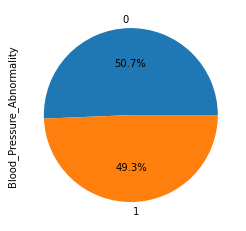

In [6]:
df['Blood_Pressure_Abnormality'].value_counts().plot(kind='pie',autopct = '%1.1f%%') 
#no imbalance in data 0 = 50.6%, 1 = 49.4%

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

<font color = darkblue size =5><center> CHEKING NULL PERCENTAGE

In [8]:
## Function for checking percentage of null values in dataframe columns

def null_value_check_in_dataframe(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

df_null = null_value_check_in_dataframe(df)
df_null

,column_name,percent_missing
Patient_Number,Patient_Number,0.0
Blood_Pressure_Abnormality,Blood_Pressure_Abnormality,0.0
Level_of_Hemoglobin,Level_of_Hemoglobin,0.0
Genetic_Pedigree_Coefficient,Genetic_Pedigree_Coefficient,4.6
Age,Age,0.0
BMI,BMI,0.0
Sex,Sex,0.0
Pregnancy,Pregnancy,77.9
Smoking,Smoking,0.0
Physical_activity,Physical_activity,0.0


<font color = darkblue size =5><center> SPLITTING DATA INTO TRAIN AND TEST DATASET

In [9]:
## Train-Test data split (10% Test data)

train,test = train_test_split(df, train_size=0.9 ,test_size = 0.1, random_state=50, stratify=df['Blood_Pressure_Abnormality'])

<font color = darkblue size =5><center> EXPLORATORY DATA ANALYSIS

<font color = darkblue size =5> 1. PEARSON CORRELATION 

<AxesSubplot:>

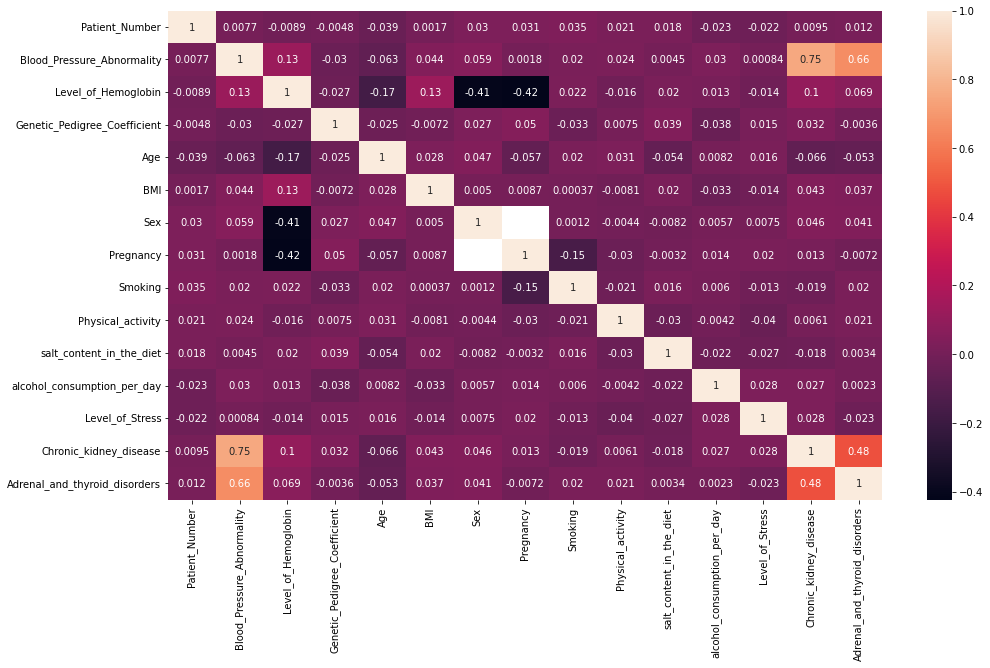

In [10]:
# calculate the correlation matrix

plt.figure(figsize=(16,9))
sns.heatmap(train.corr(), annot = True)

<font color = darkblue size =5> 2. HISTOGRAM & QQ PLOT

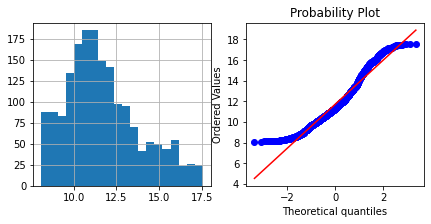

Distrtibution of level_of _hemoglobin None
Test_result ofLevel_of_Hemoglobin : ShapiroResult(statistic=0.9568712711334229, pvalue=1.152845744511056e-22)


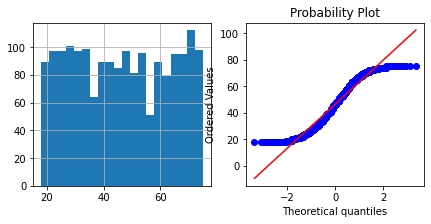

Distrtibution of Age None
Test_result ofLevel_of_Hemoglobin : ShapiroResult(statistic=0.949102520942688, pvalue=1.708525598149888e-24)


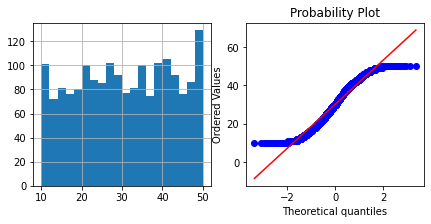

Distrtibution of BMI None
Test_result ofLevel_of_Hemoglobin : ShapiroResult(statistic=0.9562172293663025, pvalue=7.919204864646934e-23)


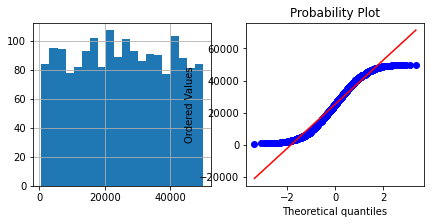

Distrtibution of Physical_activity None
Test_result ofLevel_of_Hemoglobin : ShapiroResult(statistic=0.9583735466003418, pvalue=2.776370838594129e-22)


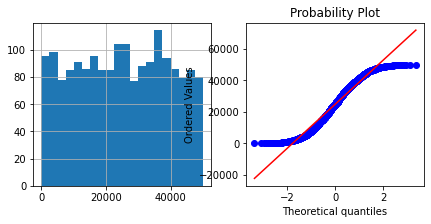

Distrtibution of salt_content_in_the_diet None
Test_result ofLevel_of_Hemoglobin : ShapiroResult(statistic=0.9576500654220581, pvalue=1.81299408495229e-22)


'Interpretation\n\n    If the P-Value of the Shapiro Test is larger than 0.05, we assume a normal distribution\n    If the P-Value of the Shapiro Test is smaller than 0.05, we do not assume a normal distribution'

In [11]:
## Plotting histogram & QQ PLOT to check the values distribution in columns

import scipy.stats as stat
import pylab

def plot_data(train,features):
  plt.figure(figsize=(7,3))
  plt.subplot(1,2,1) # 1 row, 2 columns, and this plot is the first plot.
  train[features].hist(bins=20)
  plt.subplot(1,2,2) #1 row, 2 columns, and this plot is the second plot.
  stat.probplot(train[features],dist='norm',plot=pylab)
  plt.show()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from scipy.stats import norm
from scipy.stats import shapiro
def normal_Distibution_test(feature):
    my_data = norm.rvs(size=500)
    normal_test = shapiro(feature)
    return normal_test
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print ("Distrtibution of level_of _hemoglobin", plot_data(train,'Level_of_Hemoglobin'))
print ("Test_result ofLevel_of_Hemoglobin :",normal_Distibution_test(train['Level_of_Hemoglobin']))
print ("Distrtibution of Age",plot_data(train,'Age'))
print ("Test_result ofLevel_of_Hemoglobin :",normal_Distibution_test(train['Age']))
print ("Distrtibution of BMI", plot_data(train,'BMI'))
print ("Test_result ofLevel_of_Hemoglobin :",normal_Distibution_test(train['BMI']))
print ("Distrtibution of Physical_activity",plot_data(train,'Physical_activity'))
print ("Test_result ofLevel_of_Hemoglobin :",normal_Distibution_test(train['Physical_activity']))
print ("Distrtibution of salt_content_in_the_diet", plot_data(train,'salt_content_in_the_diet'))
print ("Test_result ofLevel_of_Hemoglobin :",normal_Distibution_test(train['salt_content_in_the_diet']))

'''Interpretation

    If the P-Value of the Shapiro Test is larger than 0.05, we assume a normal distribution
    If the P-Value of the Shapiro Test is smaller than 0.05, we do not assume a normal distribution'''

Note : For the normal distribution in alcohol_consumption_per_day and Genetic_Pedigree_Coefficient, we will see normal distribution after handling of missing values init. 

<font color = darkblue size =5> 4. BOXPLOTS (For checking Range of Values and Outliers)

<AxesSubplot:>

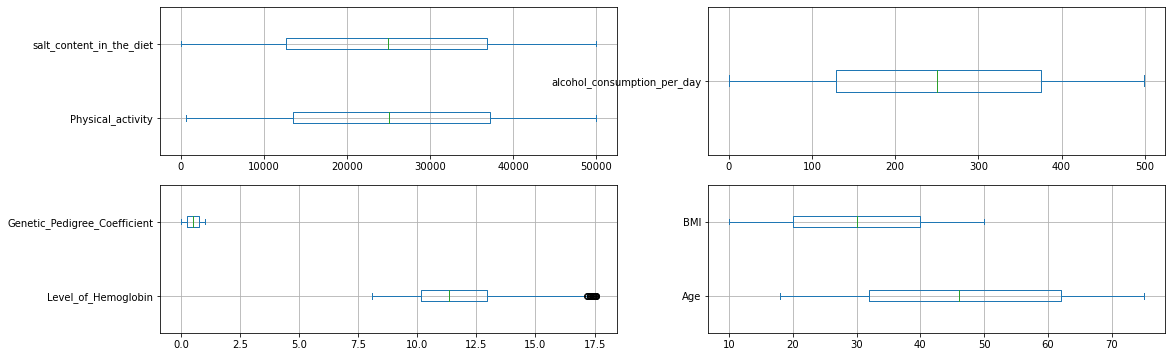

In [12]:
## Boxplot for checking the variance and outliers in data

fig, axes = plt.subplots(2, 2, figsize = (18,6))

boxplot_cols1 = ['Physical_activity','salt_content_in_the_diet']
boxplot_cols2 = ['alcohol_consumption_per_day']
boxplot_cols3 = ['Age','BMI']
boxplot_cols4 = ['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient']

train[boxplot_cols2].plot.box(vert = False, grid = True, ax=axes[0][1])
train[boxplot_cols1].plot.box(vert = False, grid = True, ax=axes[0][0])
train[boxplot_cols4].plot.box(vert = False, grid = True, ax=axes[1][0])
train[boxplot_cols3].plot.box(vert = False, grid = True, ax=axes[1][1])

In [47]:
# train["Level_of_Hemoglobin"].min()
train["Level_of_Hemoglobin"].max()

17.56

<font color = darkblue size =5> 5. PAIR PLOT (Scatter Matrix Plot)

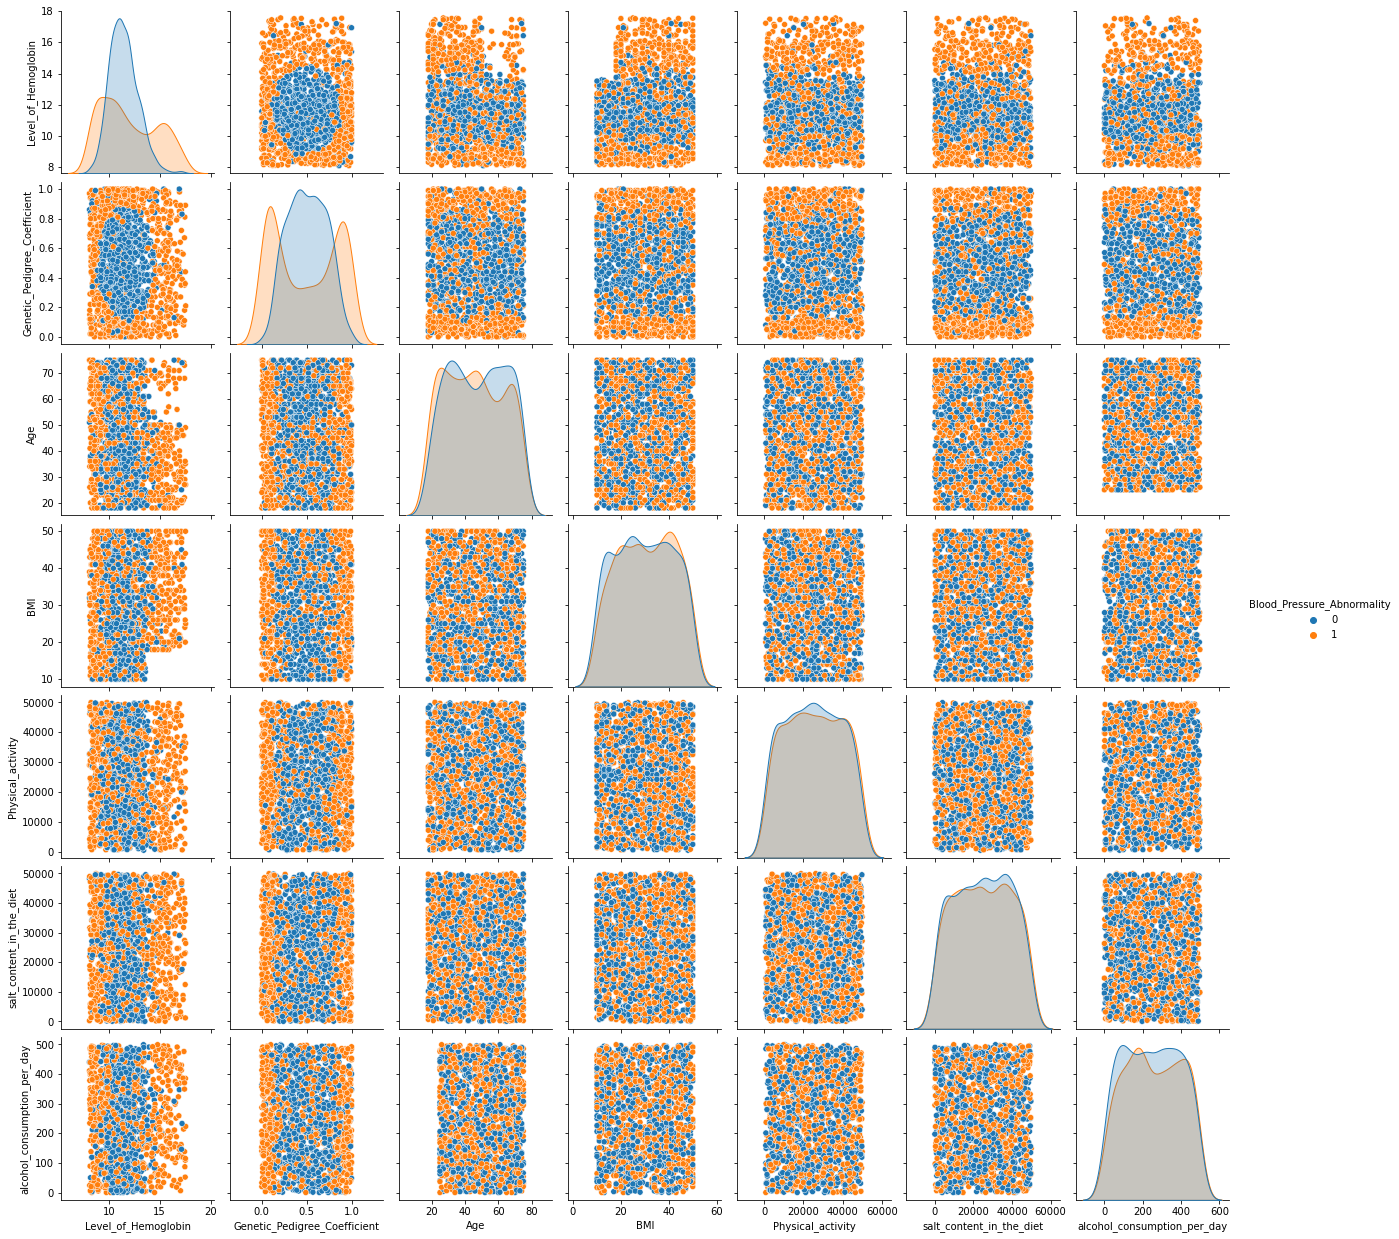

In [14]:
## Checking for the relationship between numerical variables through scatter plot
df_pairlot =  train[['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Physical_activity', 
                          'salt_content_in_the_diet','alcohol_consumption_per_day',"Blood_Pressure_Abnormality" ]]
sns.pairplot(df_pairlot, hue = 'Blood_Pressure_Abnormality')
# plt.figure.autofmt_xdate()

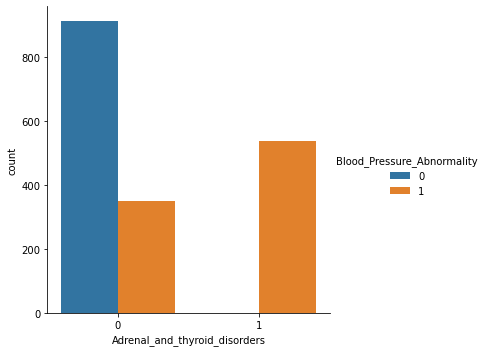

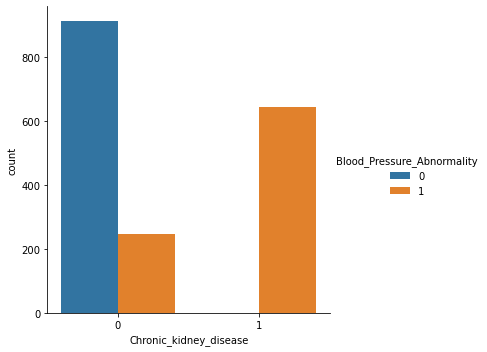

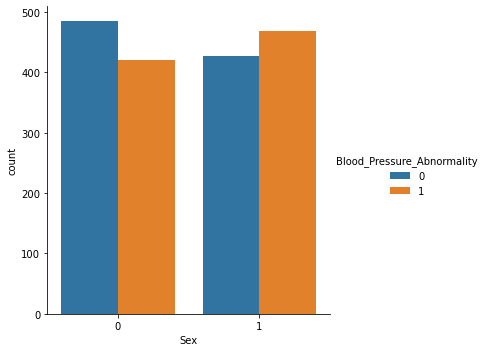

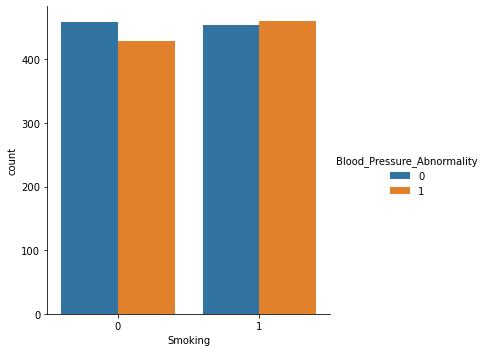

In [15]:
## Barplots for various categorical variable to check the effect on Target variable (or is there any association)

sns.catplot(x="Adrenal_and_thyroid_disorders", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Chronic_kidney_disease", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Sex", kind="count", hue="Blood_Pressure_Abnormality", data=train)
sns.catplot(x="Smoking", kind="count", hue="Blood_Pressure_Abnormality", data=train)
plt.show()


<font color = darkblue size =5><center> MISSING VALUE IMPUTATION 

In [16]:
## Fuction for Missing value imputation using IterativeImputer

def missing_value_imputation(df):
    
    ## Creating copy of a dataframe
    df_imputed = df.copy()

    ## Imputing 'Pregnancy' column values, putting Pregnancy=0 where Sex=0
    #train['Pregnancy'] = np.where(train['Sex'] == 1, train['Pregnancy'], 0)
    mask = df_imputed['Sex'] == 0
    df_imputed.loc[mask, 'Pregnancy'] = 0

    ## Remaining 'NaN' value is replaced with -1 (left Nan if for Sex=1, so created a separated category for those)
    df_imputed['Pregnancy'].fillna(-1, inplace=True)
    
    ## Changing the column type to 'int', it was 'float' earlier
    df_imputed['Pregnancy'] = df_imputed['Pregnancy'].astype(int)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    ## Imputing missing values using Iterative Imputer for columns 'Genetic_Pedigree_Coefficient' and 'alcohol_consumption_per_day'

    # Define modeling pipeline
    model = ExtraTreesRegressor(n_estimators=20, random_state=0)
    imputer = IterativeImputer(estimator=model)

    # Fitting the model
    imputer.fit(df_imputed)

    imputed_values = pd.DataFrame(imputer.transform(df_imputed), columns=df_imputed.columns)

    imputed_values['Patient_Number'] = imputed_values['Patient_Number'].astype(int)
    imputed_values_subset = imputed_values[['Patient_Number','Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day']]


    df_imputed.drop(['Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day'], axis = 1, inplace=True)
    df_imputed = pd.merge(df_imputed,imputed_values_subset, on=['Patient_Number'], how='left')
    
    return df_imputed 
normality_test = missing_value_imputation(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [17]:
normality_test.to_csv('cleaned_data1.csv')

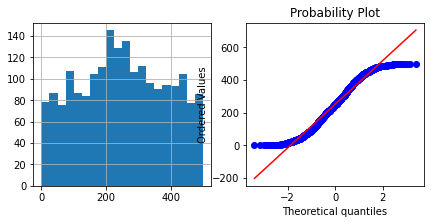

Distrtibution of alcohol_consumption_per_day None
Test_result of alcohol_consumption_per_day : ShapiroResult(statistic=0.9689675569534302, pvalue=2.3249675336953054e-20)


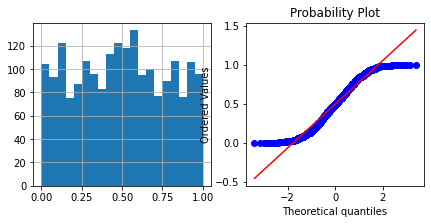

Distrtibution of Genetic_Pedigree_Coefficient None
Test_result of Genetic_Pedigree_Coefficient : ShapiroResult(statistic=0.9618606567382812, pvalue=1.5615688421112285e-22)


In [18]:
print ("Distrtibution of alcohol_consumption_per_day", plot_data(normality_test,'alcohol_consumption_per_day'))
print ("Test_result of alcohol_consumption_per_day :",normal_Distibution_test(normality_test['alcohol_consumption_per_day']))
print ("Distrtibution of Genetic_Pedigree_Coefficient",plot_data(normality_test,'Genetic_Pedigree_Coefficient'))
print ("Test_result of Genetic_Pedigree_Coefficient :",normal_Distibution_test(normality_test['Genetic_Pedigree_Coefficient']))

<font color = darkblue size =5><center>  SCALING

In [19]:
## Function for normalizing data using MinMaxScaler

def data_normalization(df):
    
    # Normalization - MinMaxScaler Transform
    cols_to_transform = ['Level_of_Hemoglobin','Age','BMI','Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day']
    df_to_transform = df[cols_to_transform]

    trans = MinMaxScaler()
    scaled_features = trans.fit_transform(df_to_transform)

    # convert the array back to a dataframe
    df_transformed = pd.DataFrame(scaled_features, index=df_to_transform.index, columns=df_to_transform.columns)

    df_subset = df.drop(cols_to_transform, axis=1)
    df_train_transformed = pd.concat([df_transformed,df_subset], axis=1)
    
    return df_train_transformed

<font color = darkblue size =5><center> ENCODING

In [20]:
## Function for performing the one-hot encoding of categorical variables

def oneHotEncoding(df):
    
    ## Creating one-hot encoding of categorical columns
    df = pd.get_dummies(df, columns=['Pregnancy','Level_of_Stress'],drop_first = True)
    5
    ## Dropping column 'Patient_Number' as it is unique id of patient, so not useful for analysis
    df.drop(['Patient_Number'], axis=1, inplace=True)

    return df

In [21]:
## Function for data preparation (which does data cleaning, normalization and column encoding)

def data_preparation(df):
    
    df_missing_value_imputation = missing_value_imputation(df)
    df_data_normalized = data_normalization(df_missing_value_imputation)
    df_onehot_encoding = oneHotEncoding(df_data_normalized)
    
    return df_onehot_encoding

<font color = darkblue size =5><center> TRAIN AND TEST DATA PREPERATION 

In [22]:
## Data Preparation for Training dataframe
df_train_cleaned = data_preparation(train)

## Data Preparation for Test dataframe
df_test_cleaned = data_preparation(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<font color = darkblue size =5><center> SEPERATING OUT TARGET AND DEPENDENT VARIABLE

In [23]:
df_train_cleaned.shape

(1800, 16)

df_train_cleaned.to_csv('cleaned_data.csv')

In [24]:
# Putting feature variable to X_train and X_test
X_train = df_train_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)
X_test = df_test_cleaned.drop(['Blood_Pressure_Abnormality'], axis=1)

# Putting response variable to y_train and y_test
y_train = df_train_cleaned['Blood_Pressure_Abnormality']
y_test = df_test_cleaned['Blood_Pressure_Abnormality']

<font color = darkblue size =5><center> BULDING RANDOM FOREST MODEL

In [25]:
# Creating a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

# Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# predicting probabilities
rf_probs = clf.predict_proba(X_test)

# keeping probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predicting labels
y_pred=clf.predict(X_test)

<font color = darkblue size =5><center> EVALUATION METRIX

In [26]:
# Calculating different metrics to check the model performance on Test data

In [27]:
## Calculating different model metrics
print("Accuracy  :: %.3f"% accuracy_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))

print("\nClassification Report ::")
print("\n",classification_report(y_test, y_pred))

Accuracy  :: 0.945
Recall    :: 0.899
Precision :: 0.989
F1 Score  :: 0.942
AUC Score :: 0.983

Classification Report ::

               precision    recall  f1-score   support

           0       0.91      0.99      0.95       101
           1       0.99      0.90      0.94        99

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



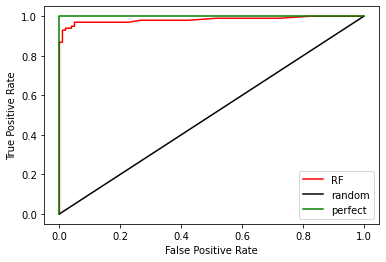

In [28]:
## Plotting ROC curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, rf_probs)

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

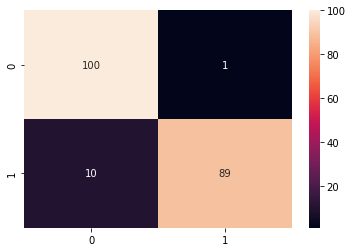

In [29]:
## Plotting confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.show()

<font color = darkblue size =5><center> FEATURE IMPORATANCE

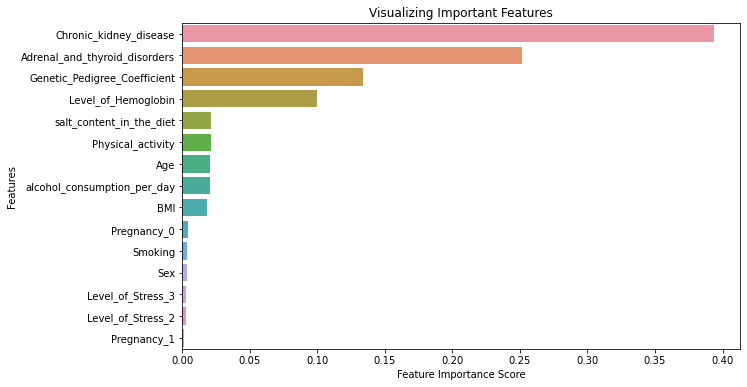

In [30]:
## Calculating Feature Importance
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot for Feature Importance
fig = plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Based on the Feature Importance we can select the subset of features, lets say Top 10 features or the features which account for 95% of the importance. The same number of features must be used in the training and testing sets.

Then We have build the model gain on Train dataset and prediction on Test dataset
Testing out multiple models

<font color = darkblue size =5><center> TESTING OUT MULTIPLE MODEL

The Idea here is to try out multiple classification models and choose the best one based on the evaluation metrics and Training/Testing time.

In [31]:
## Trying out different classification models and then we'll choose the best based on the different metrics saved

## Function for running different experiments or different models and caturing their respective metrices
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    # variable to hold all of the datasets that will be created from the application of k-fold cross validation on the training set
    dfs = []
    
    # list of tuples holding the name and class for each classifier to be tested
    models = [('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier(eval_metric='logloss'))
             ]

    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    for name, model in models:

      kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
      cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

      clf = model.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      print(name)
      print(classification_report(y_test, y_pred))

      results.append(cv_results)
      names.append(name)

      this_df = pd.DataFrame(cv_results)
      this_df['model'] = name
      dfs.append(this_df)
      final = pd.concat(dfs, ignore_index=True)

    return final

In [32]:
## Calling model experimentation function
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       101
           1       1.00      0.86      0.92        99

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

RF
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       101
           1       0.99      0.89      0.94        99

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

KNN
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       101
           1       1.00      0.85      0.92        99

    accuracy                           0.93       200
   macro avg       0.94      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

SVM
 

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

XGB
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       101
           1       0.99      0.89      0.94        99

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [33]:
## To obtain better estimates of the distribution of metrics from each model, ran empirical bootstrapping at 30 samples. 
## Additionally, partitioned the data into two sorts: performance metrics and fit-time metrics.

bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')

# fit time metrics
time_metrics = ['fit_time','score_time'] 

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

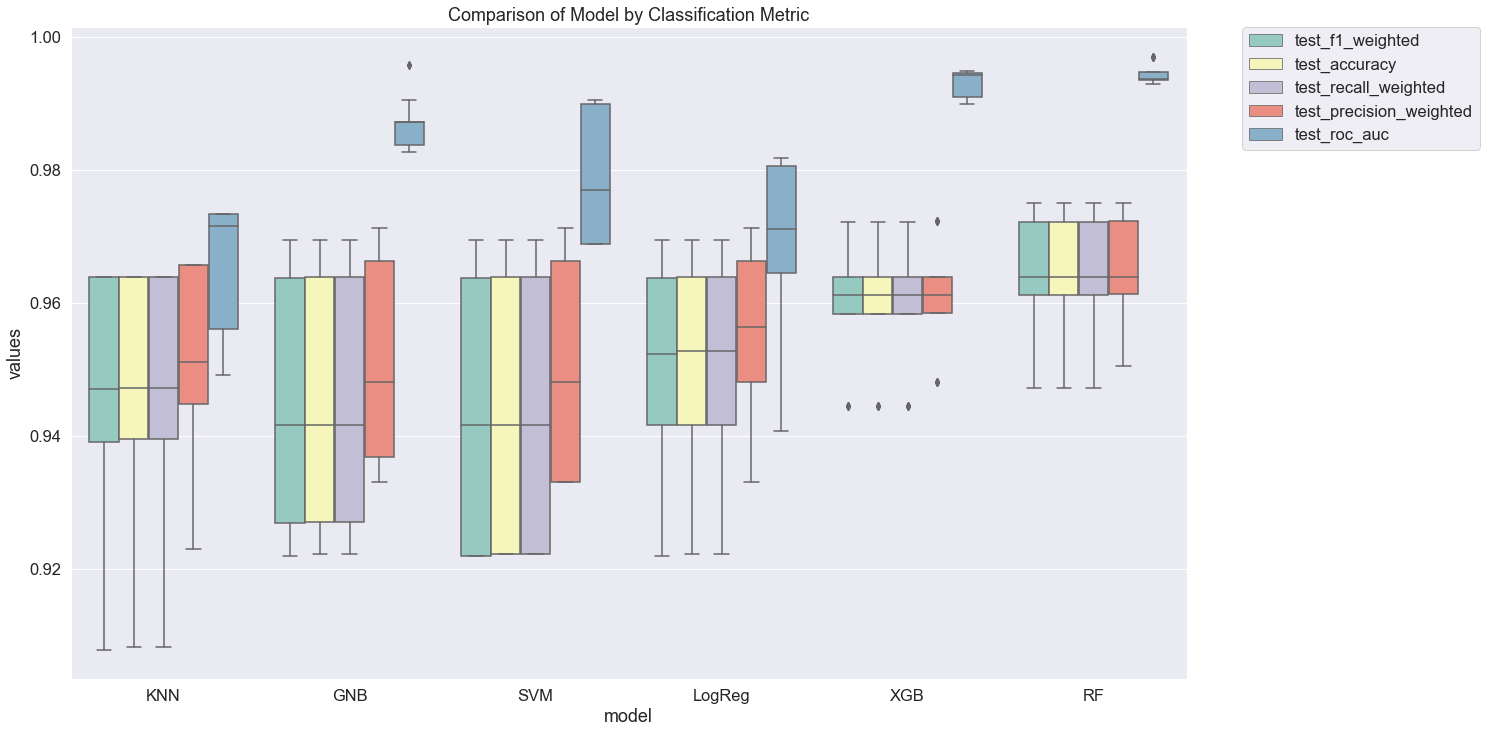

In [34]:
## Plotting performance metrics from the 5-fold cross validation.

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.show()

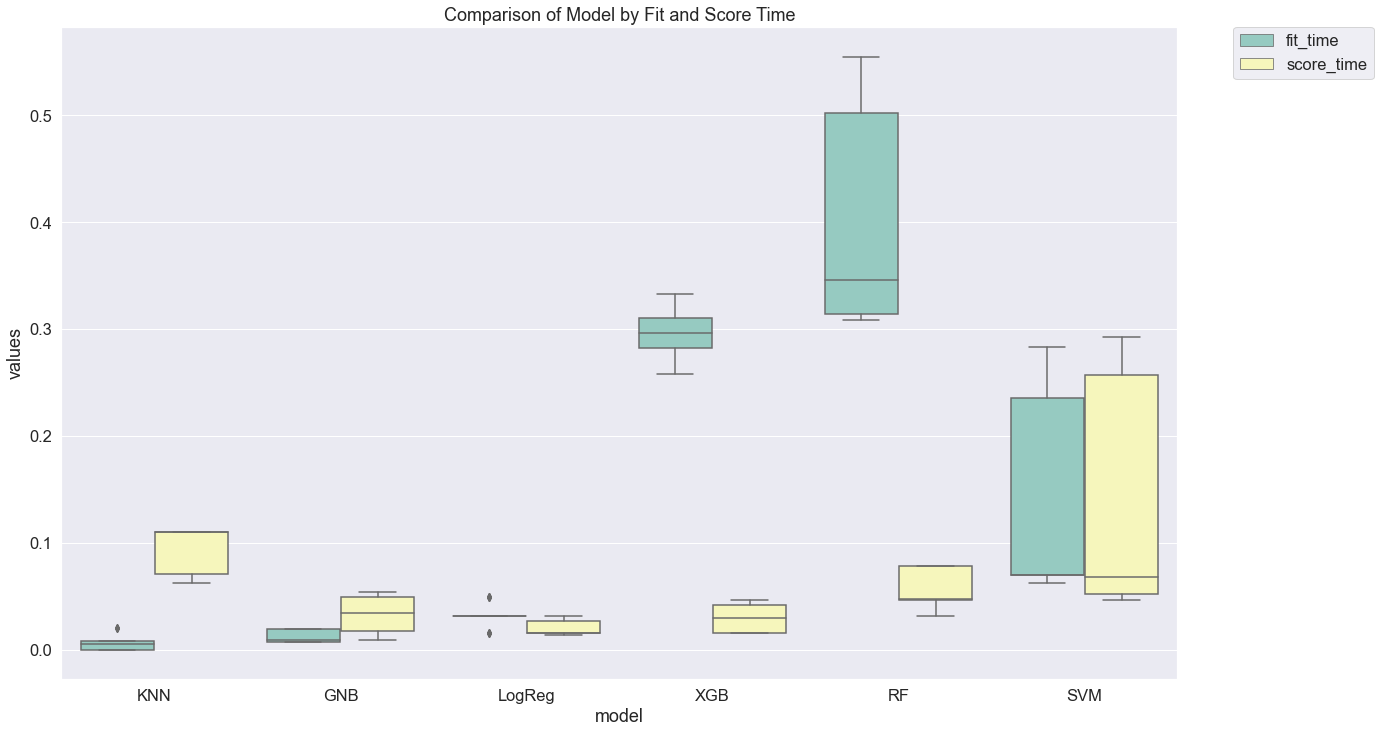

In [35]:
## Training and Scoring time comparison by plotting

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.show()

In [36]:
## Evaluation metrics details for all the trained models

metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_precision_weighted           test_roc_auc           test_accuracy  \
                           std      mean          std      mean           std   
model                                                                           
GNB                   0.014094  0.951617     0.003855  0.987220      0.017564   
KNN                   0.013815  0.950608     0.009176  0.965048      0.017799   
LogReg                0.012969  0.954726     0.014071  0.968381      0.016087   
RF                    0.008569  0.965615     0.001548  0.994426      0.009584   
SVM                   0.015260  0.950559     0.009361  0.979460      0.019099   
XGB                   0.007902  0.960342     0.002080  0.993213      0.009131   

                 test_recall_weighted           test_f1_weighted            
            mean                  std      mean              std      mean  
model                                                                       
GNB     0.945741             0.017564  0.945741         0.017613  0.945608  
KNN     0.945370             0.017799  0.945370         0.017947  0.945170  
LogReg  0.949722             0.016087  0.949722         0.016124  0.949573  
RF      0.965000             0.009584  0.965000         0.009577  0.964993  
SVM     0.944352             0.019099  0.944352         0.019156  0.944194  
XGB     0.959537             0.009131  0.959537         0.009129  0.959534

In [37]:
## Training and prediction time calculation for all the trained models

time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time          
              std      mean       std      mean
model                                          
GNB      0.017053  0.030569  0.005077  0.011534
KNN      0.020599  0.093815  0.006750  0.005394
LogReg   0.007040  0.020975  0.010265  0.032242
RF       0.019420  0.057649  0.098754  0.386509
SVM      0.103337  0.130826  0.095103  0.128657
XGB      0.012584  0.032024  0.026639  0.296892

Based on the Evaluation Metrics (Accuracy, Precision Recall, F1-score etc.) Random Forest(RF) isary (or oth by far the best model. But it is having slightly higher model training time (fit_time) compared to other models (except XGBoost, which is even having higer training time).

Either we can choose the Random Forest (as a best model) or go for second best model (in terms of prediction metrics and training time which is GNB(Gaussian Naive Bayes) else XGB is also a good option in case of accuracy and less training time.

So, this is basically an trade-of between the Accuracy(or other metrics for that matter) and the Training time, so we have to decide which one to choose if we have comparable model(slightly high/low prediction metrics and high/low mdel building/training time) because there is cost involve in that (Time + resources) and every business is having different context to look into this.

Once the model is finalized, then we'll go for the Hyperparameter tuning in oder to improve the model Accuracy further ( We'll have to decide based on the business objective whethere we really need this or not).

<font color = darkblue size =5><center> HYPERPARAMETER TUNING

<font color = darkblue size =5>1. RANDOM FOREST

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
grid_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(grid_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [39]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = grid_grid, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   verbose=2)

In [40]:
rf_grid.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [41]:
# Creating a Random Forest Classifier
clf=RandomForestClassifier(n_estimators= 944,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 70,
 bootstrap= True)

# Training the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# predicting probabilities
rf_probs = clf.predict_proba(X_test)

# keeping probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# predicting labels
y_pred=clf.predict(X_test)

In [42]:
## Calculating different model metrics
print("Accuracy  :: %.3f"% accuracy_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))

print("\nClassification Report ::")
print("\n",classification_report(y_test, y_pred))

Accuracy  :: 0.950
Recall    :: 0.909
Precision :: 0.989
F1 Score  :: 0.947
AUC Score :: 0.977

Classification Report ::

               precision    recall  f1-score   support

           0       0.92      0.99      0.95       101
           1       0.99      0.91      0.95        99

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



### Accuracy of this Model is 95%

<font color = darkblue size =5><center> TESING OF MODEL ON UNSEEN DATA

In [43]:
X_test.iloc[3]

Level_of_Hemoglobin              0.546326
Age                              0.877193
BMI                              0.650000
Physical_activity                0.273213
salt_content_in_the_diet         0.278051
alcohol_consumption_per_day      0.890688
Sex                              0.000000
Smoking                          1.000000
Chronic_kidney_disease           0.000000
Adrenal_and_thyroid_disorders    0.000000
Genetic_Pedigree_Coefficient     0.200000
Pregnancy_0                      1.000000
Pregnancy_1                      0.000000
Level_of_Stress_2                0.000000
Level_of_Stress_3                1.000000
Name: 3, dtype: float64

In [44]:
clf.predict([X_test.iloc[3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [45]:
clf.predict([[0.54,0.877,0.65,0.27,0.28,0.89,0.00,1.0,0.00,0,0.2,1.0,0,0,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [46]:
end_time = time.time()
print('Time taken to execute a Model is :',end_time-start_time)

Time taken to execute a Model is : 1505.5369238853455
